# **量子ゲート講座 第三回（エントリーコース）**
この講座では量子ゲート方式の量子コンピュータの計算について学びます。\
エントリーコースでは数式を一切使用せずに行います。量子ゲートの計算の雰囲気を味わってもらえたら幸いです。

講座数: 全3回（各講座60分）\
対象年齢: 中学生以上


### **第三回講座内容**
この講座では第一回、第二回で学習した知識をもとに色々な問題を量子ゲートを使って解いていきます。

1.   条件に合う量子ゲートを作成してみよう
2.   シフト希望から勤務表を作成してみよう。
3.   演習 & 考察


## **1. 条件に合う量子ゲートを作成してみよう**
第二回では重ね合わせの性質を用いて足し算回路の作成方法について学びました。\
この応用方法について条件に応じた組み合わせのみを出力する方法があります。

#### **条件に応じた組み合わせのみを出力**

この解決策としては条件に応じた組み合わせのみを出力する方法があります。\
先ほどの例の場合では「1+1の答えのみ」「答えが一桁になる場合のみ」「答えが二桁になる場合のみ」が出力されるような量子回路を作成することになります。

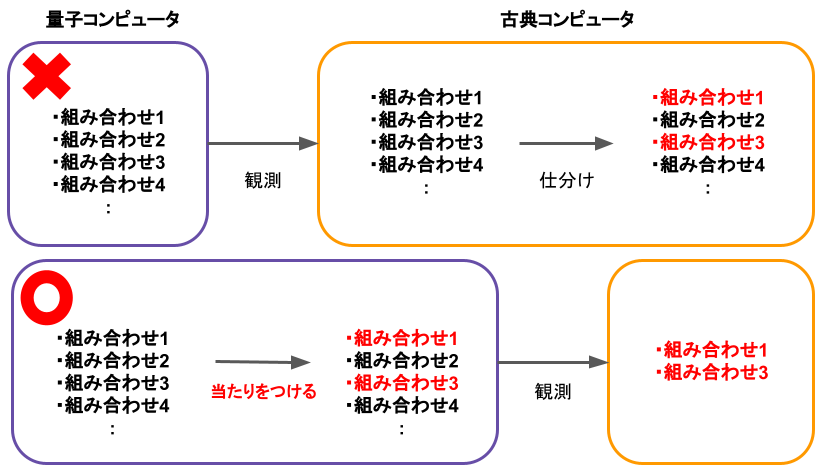

このような量子回路を作成するには条件に合致するように量子回路に "当たり" をつけて出力を絞ります。
今回はこの "当たり" をつける問題を解いてみます。

In [ ]:
# qiskitのインストール
!pip install qiskit==0.44.3 qiskit-aer==0.13 'qiskit[visualization]'

# networkxのインストール
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 7.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of qiskit[visualization] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 98.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of qiskit-terra[visualization] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### **例題1**
入力が "00" から "11" の4通りのうち、"11" のときだけ "1" を返すような回路を作成してください。

#### **概観**
この問題を考えるにあたって、まず始めに全体の量子ビット数を考える必要があります。\
ここで重要になるのは入出力の量子ビットですが、今回は入力は2ビット、出力が1ビットなので全体で3量子ビットあれば実現できそうです。

#### **入力部分**
入力が "00" から "11" の4通りの組み合わせを一度に計算を行いますので、入力の2量子ビットに Hゲートを施せば実現できそうです。

観測回数: 1000回
取得した値: 11, 取得回数: 244回, Input1: 1, Input2: 1
取得した値: 10, 取得回数: 235回, Input1: 1, Input2: 0
取得した値: 01, 取得回数: 282回, Input1: 0, Input2: 1
取得した値: 00, 取得回数: 239回, Input1: 0, Input2: 0


/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:282: UserWarning: Style JSON file 'clifford.json' not found in any of these locations: /usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/styles/clifford.json, clifford.json. Will use default style.
  self._style, def_font_ratio = load_style(self._style)


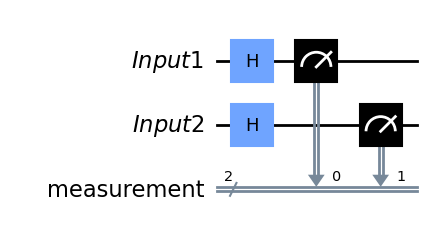

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qInput1 = QuantumRegister(1, name="Input1")
qInput2 = QuantumRegister(1, name="Input2")
c = ClassicalRegister(2, name="measurement")
qc = QuantumCircuit(qInput1, qInput2, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)

# Step2. 観測して値を取得する。
qc.measure([0, 1], [0, 1])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: {k[::-1]}, 取得回数: {v}回, Input1: {k[::-1][0]}, Input2: {k[::-1][1]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", fold=-1)

取得した値から分かる通り "00" から "11" の4通りを出力することができました。

#### **出力部分**
入力の2量子ビットに加えて出力用に1量子ビット加えます。

観測回数: 1000回
取得した値: 110, 取得回数: 226回, Input1: 1, Input2: 1, Output: 0
取得した値: 010, 取得回数: 264回, Input1: 0, Input2: 1, Output: 0
取得した値: 000, 取得回数: 273回, Input1: 0, Input2: 0, Output: 0
取得した値: 100, 取得回数: 237回, Input1: 1, Input2: 0, Output: 0


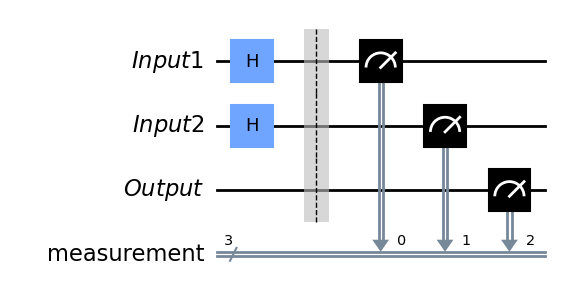

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qInput1 = QuantumRegister(1, name="Input1")
qInput2 = QuantumRegister(1, name="Input2")
qoutput = QuantumRegister(1, name="Output")
c = ClassicalRegister(3, name="measurement")
qc = QuantumCircuit(qInput1, qInput2, qoutput, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2], [0, 1, 2])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: {k[::-1]}, 取得回数: {v}回, Input1: {k[::-1][0]}, Input2: {k[::-1][1]}, Output: {k[::-1][2]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", fold=-1)

回路図から分かる通り、出力用の量子ビット（Output）を一つ加えました。
出力用の量子ビットにはまだ何も量子ビットゲートを施していないので、取得した値は全て "0" になります。
ここに入力用の量子ビットと出力用の量子ビットに何らかの量子ビットゲートを施して、入力が "11" のときのみ出力が "1" になるようにします。

### **例題2**
入力が "000" から "111" の8通りのうち、"111" のときだけ "1" を返すような回路を作成してください。

#### **概観**
この問題を考えるにあたって、まず始めに全体の量子ビット数を考える必要があります。\
ここで重要になるのは入出力の量子ビットですが、今回は入力は3ビット、出力が1ビットなので全体で4量子ビットあれば実現できそうです。

#### **入力部分**
入力が "000" から "111" の8通りの組み合わせを一度に計算を行いますので、入力の3量子ビットに Hゲートを施せば実現できそうです。

観測回数: 1000回
取得した値: 101, 取得回数: 118回, Input1: 1, Input2: 0, Input3: 1
取得した値: 100, 取得回数: 142回, Input1: 1, Input2: 0, Input3: 0
取得した値: 001, 取得回数: 137回, Input1: 0, Input2: 0, Input3: 1
取得した値: 000, 取得回数: 127回, Input1: 0, Input2: 0, Input3: 0
取得した値: 010, 取得回数: 117回, Input1: 0, Input2: 1, Input3: 0
取得した値: 011, 取得回数: 108回, Input1: 0, Input2: 1, Input3: 1
取得した値: 111, 取得回数: 120回, Input1: 1, Input2: 1, Input3: 1
取得した値: 110, 取得回数: 131回, Input1: 1, Input2: 1, Input3: 0


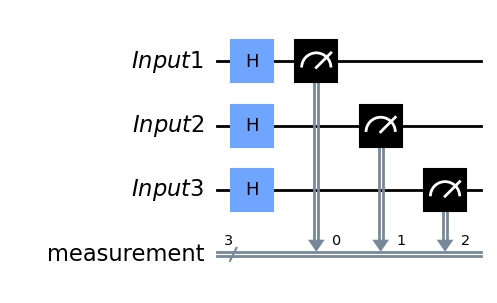

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qInput1 = QuantumRegister(1, name="Input1")
qInput2 = QuantumRegister(1, name="Input2")
qInput3 = QuantumRegister(1, name="Input3")
c = ClassicalRegister(3, name="measurement")
qc = QuantumCircuit(qInput1, qInput2, qInput3, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2], [0, 1, 2])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: {k[::-1]}, 取得回数: {v}回, Input1: {k[::-1][0]}, Input2: {k[::-1][1]}, Input3: {k[::-1][2]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", fold=-1)

取得した値から分かる通り "000" から "111" の8通りを出力することができました。

#### **出力部分**
入力の3量子ビットに加えて出力用に1量子ビット加えます。

観測回数: 1000回
取得した値: 0010, 取得回数: 126回, Input1: 0, Input2: 0, Input3: 1, Output: 0
取得した値: 0110, 取得回数: 136回, Input1: 0, Input2: 1, Input3: 1, Output: 0
取得した値: 1000, 取得回数: 108回, Input1: 1, Input2: 0, Input3: 0, Output: 0
取得した値: 1010, 取得回数: 118回, Input1: 1, Input2: 0, Input3: 1, Output: 0
取得した値: 1100, 取得回数: 143回, Input1: 1, Input2: 1, Input3: 0, Output: 0
取得した値: 1110, 取得回数: 122回, Input1: 1, Input2: 1, Input3: 1, Output: 0
取得した値: 0000, 取得回数: 123回, Input1: 0, Input2: 0, Input3: 0, Output: 0
取得した値: 0100, 取得回数: 124回, Input1: 0, Input2: 1, Input3: 0, Output: 0


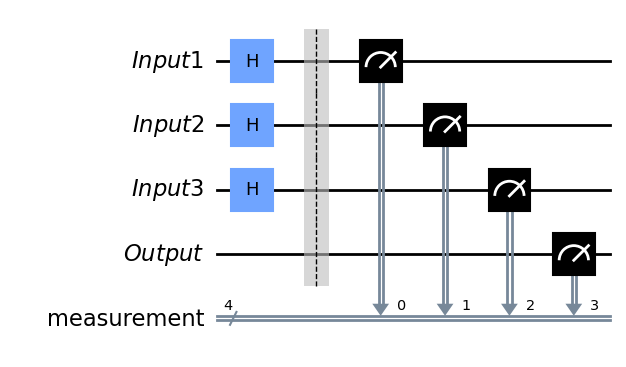

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qInput1 = QuantumRegister(1, name="Input1")
qInput2 = QuantumRegister(1, name="Input2")
qInput3 = QuantumRegister(1, name="Input3")
qoutput = QuantumRegister(1, name="Output")
c = ClassicalRegister(4, name="measurement")
qc = QuantumCircuit(qInput1, qInput2, qInput3, qoutput, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: {k[::-1]}, 取得回数: {v}回, Input1: {k[::-1][0]}, Input2: {k[::-1][1]}, Input3: {k[::-1][2]}, Output: {k[::-1][3]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", fold=-1)

回路図から分かる通り、出力用の量子ビット（Output）を一つ加えました。\
出力用の量子ビットにはまだ何も量子ビットゲートを施していないので、取得した値は全て "0" になります。\
ここに入力用の量子ビットと出力用の量子ビットに何らかの量子ビットゲートを施して、入力が "111" のときのみ出力が "1" になるようにします。

試しに適当に量子ビットゲートを置いてみます。

観測回数: 1000回
取得した値: 0110, 取得回数: 137回, Input1: 0, Input2: 1, Input3: 1, Output: 0
取得した値: 0000, 取得回数: 120回, Input1: 0, Input2: 0, Input3: 0, Output: 0
取得した値: 0100, 取得回数: 115回, Input1: 0, Input2: 1, Input3: 0, Output: 0
取得した値: 1010, 取得回数: 127回, Input1: 1, Input2: 0, Input3: 1, Output: 0
取得した値: 0010, 取得回数: 139回, Input1: 0, Input2: 0, Input3: 1, Output: 0
取得した値: 1101, 取得回数: 132回, Input1: 1, Input2: 1, Input3: 0, Output: 1
取得した値: 1111, 取得回数: 113回, Input1: 1, Input2: 1, Input3: 1, Output: 1
取得した値: 1000, 取得回数: 117回, Input1: 1, Input2: 0, Input3: 0, Output: 0


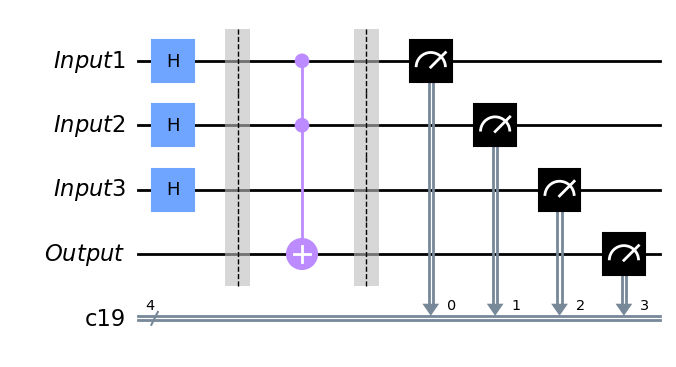

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qInput1 = QuantumRegister(1, name="Input1")
qInput2 = QuantumRegister(1, name="Input2")
qInput3 = QuantumRegister(1, name="Input3")
qoutput = QuantumRegister(1, name="Output")
c = ClassicalRegister(4)
qc = QuantumCircuit(qInput1, qInput2, qInput3, qoutput, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()
qc.ccx(0, 1, 3)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: {k[::-1]}, 取得回数: {v}回, Input1: {k[::-1][0]}, Input2: {k[::-1][1]}, Input3: {k[::-1][2]}, Output: {k[::-1][3]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", fold=-1)

取得した値から入力が "111" のときに出力を "1" にすることができました。一方で入力が "110" のときも出力が "1" になっています。\
したがって、よりうまく量子ビットゲートを施して、入力が "111" のときのみ出力が "1" になるようにしなければなりません。

#### **補助量子ビット**
先ほどのように、量子回路を作成していくのですが何かしら思い付かない限り、問題によってはかなり難しいです。\
これを解決するために**補助量子ビット（アンシラビット、Ancilla）**を導入します。

補助量子ビットはその名の通り、計算の補助を行う量子ビットのことです。\
実装は簡単で通常の回路に余分に量子ビットを増やして、それを補助量子ビットとします。\
補助量子ビットを用いることで一時的な計算結果を保持することができます。

補助量子ビットを1つ使う場合は以下のような量子回路になります。

観測回数: 1000回
取得した値: 10000, 取得回数: 116回, C1: 1, C2: 0, C3: 0, Ancilla: 0, Answer: 0
取得した値: 00100, 取得回数: 122回, C1: 0, C2: 0, C3: 1, Ancilla: 0, Answer: 0
取得した値: 11100, 取得回数: 123回, C1: 1, C2: 1, C3: 1, Ancilla: 0, Answer: 0
取得した値: 11000, 取得回数: 117回, C1: 1, C2: 1, C3: 0, Ancilla: 0, Answer: 0
取得した値: 01000, 取得回数: 127回, C1: 0, C2: 1, C3: 0, Ancilla: 0, Answer: 0
取得した値: 00000, 取得回数: 143回, C1: 0, C2: 0, C3: 0, Ancilla: 0, Answer: 0
取得した値: 01100, 取得回数: 134回, C1: 0, C2: 1, C3: 1, Ancilla: 0, Answer: 0
取得した値: 10100, 取得回数: 118回, C1: 1, C2: 0, C3: 1, Ancilla: 0, Answer: 0


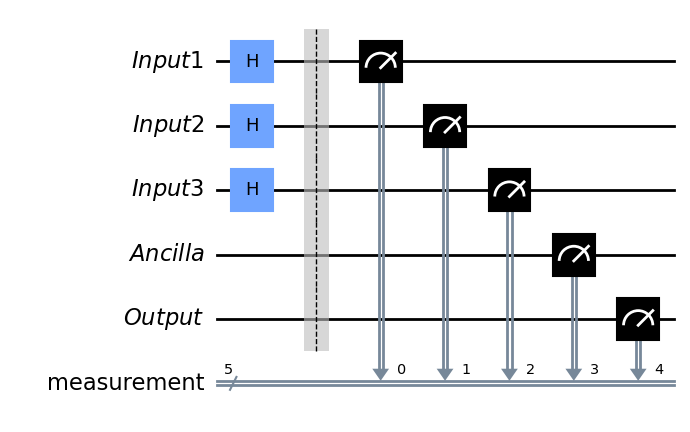

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qInput1 = QuantumRegister(1, name="Input1")
qInput2 = QuantumRegister(1, name="Input2")
qInput3 = QuantumRegister(1, name="Input3")
qAnc = AncillaRegister(1, name="Ancilla")
qOutput = QuantumRegister(1, name="Output")
c = ClassicalRegister(5, name="measurement")
qc = QuantumCircuit(qInput1, qInput2, qInput3, qAnc, qOutput, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: {k[::-1]}, 取得回数: {v}回, C1: {k[::-1][0]}, C2: {k[::-1][1]}, C3: {k[::-1][2]}, Ancilla: {k[::-1][3]}, Answer: {k[::-1][4]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", fold=-1)

デバイスが許す限り、補助量子ビットはいくらでも増やすことが可能です。

#### **例題の解法**
入出力の部分と補助量子ビットを1つ用いることで今回の回路は実現できます。\
入力の状態が "11" の場合に "1" を出力させることは CCXゲートで実現することができます。\
これを応用して、"111" を2回に分けて判定を行います。

1. 入力部分の始めの2量子ビットが "11" か否かを判定して補助量子ビットに格納する。
2. 入力部分の最後の1量子ビットと補助量子ビットが "11" か否かを判定して出力部分に格納する。

上の流れで実装を行うと、入力部分が "111" のときのみ出力部分が "1" になることがわかります。

観測回数: 1000回
取得した値: 11010, 取得回数: 123回, C1: 1, C2: 1, C3: 0, Ancilla: 1, Answer: 0
取得した値: 01100, 取得回数: 111回, C1: 0, C2: 1, C3: 1, Ancilla: 0, Answer: 0
取得した値: 10100, 取得回数: 127回, C1: 1, C2: 0, C3: 1, Ancilla: 0, Answer: 0
取得した値: 11111, 取得回数: 130回, C1: 1, C2: 1, C3: 1, Ancilla: 1, Answer: 1
取得した値: 00100, 取得回数: 134回, C1: 0, C2: 0, C3: 1, Ancilla: 0, Answer: 0
取得した値: 00000, 取得回数: 126回, C1: 0, C2: 0, C3: 0, Ancilla: 0, Answer: 0
取得した値: 01000, 取得回数: 123回, C1: 0, C2: 1, C3: 0, Ancilla: 0, Answer: 0
取得した値: 10000, 取得回数: 126回, C1: 1, C2: 0, C3: 0, Ancilla: 0, Answer: 0


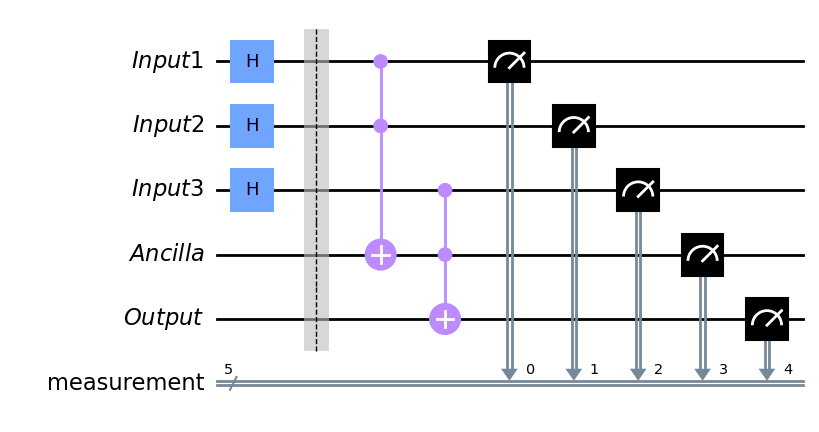

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qInput1 = QuantumRegister(1, name="Input1")
qInput2 = QuantumRegister(1, name="Input2")
qInput3 = QuantumRegister(1, name="Input3")
qAnc = AncillaRegister(1, name="Ancilla")
qOutput = QuantumRegister(1, name="Output")
c = ClassicalRegister(5, name="measurement")
qc = QuantumCircuit(qInput1, qInput2, qInput3, qAnc, qOutput, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()
qc.ccx(0, 1, 3)
qc.ccx(2, 3, 4)


# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4], [0, 1, 2, 3, 4])
shots = 10000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: {k[::-1]}, 取得回数: {v}回, C1: {k[::-1][0]}, C2: {k[::-1][1]}, C3: {k[::-1][2]}, Ancilla: {k[::-1][3]}, Answer: {k[::-1][4]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", fold=-1)

結果から入力部分が "111" のときのみ出力部分が "1" になるような量子回路を作成することができました。

## **2. シフト希望から勤務表を作成してみよう。**
今までの量子回路は単に計算の方法について説明を行っていきましたが、ここでは現実問題により近い問題を解いてみます。\
今回は以下の簡単なシフト希望をもとに勤務表を作成することを考えます。

|従業員|朝|昼|夜|
|:-:|:-:|:-:|:-:|
|A|◯|||
|B||◯|◯|
|C|◯||◯|

3人の従業員とシフトには朝・昼・夜の三つがあるとします。
各時間帯で従業員が1名になるような勤務表を作成することを考えます。

#### **求めたい最終結果**

||朝|昼|夜|
|:-:|:-:|:-:|:-:|
|従業員の人数|1|1|1|

答えは明らかですが、A と B さんの2人がシフトに入る場合になります。

#### **概観**
この問題を考えるにあたって、考えることが以下の3点あります。

*   どのようにシフト希望を量子回路に埋め込むか
*   各時間帯の従業員のシフト希望をどのように表現するか
*   出力結果をどのように表現するか

先ほどの問題と同じように全体の量子ビット数を考えるためには上の3点を解決する必要があります。\
それぞれ解説していきます。

#### **どのようにシフト希望を量子回路に埋め込むか**

ここでは入力部分を考えます。一般的に量子コンピュータでデータを扱う（埋め込む）方法に関しては、
量子コンピュータならではの特別な方法がありますが、必ずしもそれだけではありません。

通常の古典コンピュータで考える場合と同じように扱うことでうまくデータを埋め込むことができます。
今回は後者の方法でシフト希望の内容を量子回路に埋め込みます。

シフト希望データはざっくり考えると従業員と勤務時間の集合体だと見ることができます。
ちなみに今回は従業員が A, B, C の3人、勤務時間が 朝, 昼, 夜 の3つあります。

これらの6つの情報を量子回路に埋め込みます。今回は単純に6量子ビットを用意して、それぞれに対応付けます。

観測回数: 1000回
取得した値: '000000', 取得回数: 1000回, A: 0, B: 0, C: 0, 朝: 0, 昼: 0, 夜: 0


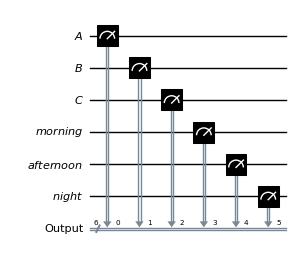

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qA = QuantumRegister(1, name="A")
qB = QuantumRegister(1, name="B")
qC = QuantumRegister(1, name="C")
qMorning = QuantumRegister(1, name="morning")
qAfternoon = QuantumRegister(1, name="afternoon")
qNight = QuantumRegister(1, name="night")
c = ClassicalRegister(6, name="Output")
qc = QuantumCircuit(qA, qB, qC, qMorning, qAfternoon, qNight, c)

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, A: {k[::-1][0]}, B: {k[::-1][1]}, C: {k[::-1][2]}, 朝: {k[::-1][3]}, 昼: {k[::-1][4]}, 夜: {k[::-1][5]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", scale=0.5, fold=-1)

シフト希望データの各情報を埋め込むための量子ビットを用意することができました。

#### **各時間帯の従業員のシフト希望をどのように表現するか**
先ほど用意した量子ビットを用いて人数制限を表現してみます。
例えば朝の場合のシフトを見てみます。

|従業員|朝|
|:-:|:-:|
|A|◯|
|B||
|C|◯|

AさんとCさんはシフト希望が入っていることがわかります。
逆にBさんはシフト希望が入っていません。

このようにシフト希望が入っている人を "1"、そうでない人を "0" と表現をすることで各シフト希望を埋め込むことができます。\
今回は従業員が3人いるので、それぞれの従業員がシフト希望に含まれているか否かを考えます。\
これは第二回の講座や先ほどの問題と同様に重ね合わせの性質を用いて表現することができます。

観測回数: 1000回
取得した値: '011000', 取得回数: 117回, A: 0, B: 1, C: 1, 朝: 0, 昼: 0, 夜: 0
取得した値: '100000', 取得回数: 117回, A: 1, B: 0, C: 0, 朝: 0, 昼: 0, 夜: 0
取得した値: '001000', 取得回数: 127回, A: 0, B: 0, C: 1, 朝: 0, 昼: 0, 夜: 0
取得した値: '101000', 取得回数: 139回, A: 1, B: 0, C: 1, 朝: 0, 昼: 0, 夜: 0
取得した値: '110000', 取得回数: 133回, A: 1, B: 1, C: 0, 朝: 0, 昼: 0, 夜: 0
取得した値: '111000', 取得回数: 125回, A: 1, B: 1, C: 1, 朝: 0, 昼: 0, 夜: 0
取得した値: '000000', 取得回数: 127回, A: 0, B: 0, C: 0, 朝: 0, 昼: 0, 夜: 0
取得した値: '010000', 取得回数: 115回, A: 0, B: 1, C: 0, 朝: 0, 昼: 0, 夜: 0


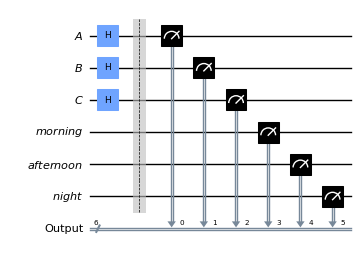

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qA = QuantumRegister(1, name="A")
qB = QuantumRegister(1, name="B")
qC = QuantumRegister(1, name="C")
qMorning = QuantumRegister(1, name="morning")
qAfternoon = QuantumRegister(1, name="afternoon")
qNight = QuantumRegister(1, name="night")
c = ClassicalRegister(6, name="Output")
qc = QuantumCircuit(qA, qB, qC, qMorning, qAfternoon, qNight, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, A: {k[::-1][0]}, B: {k[::-1][1]}, C: {k[::-1][2]}, 朝: {k[::-1][3]}, 昼: {k[::-1][4]}, 夜: {k[::-1][5]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", scale=0.5, fold=-1)

8通りの各シフト希望が含まれるか否かを考えた組み合わせを出力することができました。\
一方で出力された組み合わせにはシフト希望の内容以外のものも含まれていることがわかります。\
従って必要ない部分は省く必要があります。

#### **出力結果をどのように表現するか**
各シフト希望が含まれるか否かを考えた組み合わせを出力することはできましたが、実際のシフト希望のみを絞ることは現状できていません。
始めの問題のように求めたい経路に何かしらの "当たり" をつける必要があります。

"当たり" をつけるためには条件を考えなければなりませんが、各時間帯で従業員が1名になる条件とは何でしょう。\
先ほどの朝の場合のシフト希望を見てみます。

|従業員|朝|
|:-:|:-:|
|A|◯|
|B||
|C|◯|

この時間帯には A と C さんがシフト希望に入っています。\
また、朝は従業員が1名入らないといけないので、必ず A と C さんのどちらかは入る必要があります。

次に昼の場合のシフト希望を見てみます。

|従業員|昼|
|:-:|:-:|
|A|||
|B|◯|
|C||

この時間帯には B さんのみがシフト希望に入っています。\
また、昼は従業員が1名入らないといけないので、必ず B さんが入る必要があります。

最後に夜の場合のシフト希望を見てみます。

|従業員|夜|
|:-:|:-:|
|A||
|B|◯|
|C|◯|

この時間帯には B と C さんがシフト希望に入っています。\
また、夜は従業員が1名入らないといけないので、必ず B と C さんのどちらかは入る必要があります。

これらのもとに以下の3つの条件を満たす場合にシフト希望が満たされるということができます。

*   朝は A と C さんのどちらかが入る
*   昼は B さんが入る
*   夜は B と C さんのどちらかが入る

これらの条件を量子回路で表現してみます。\
今回の3つの条件は各時間帯、朝、昼、夜ごとに与えられています。

各時間帯の条件を満たす場合は "1"、そうでない場合は "0" を返すようにします。\
朝の条件は A, C のどちらかが "1" になればいいので、以下の表で表現できます。

| A | C | 条件に合致している |
| :-: | :-: | :-: |
| 1 | 1 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 0 | 0 | 0 |

同様に夜の条件は B, C のどちらかが "1" になればいいので、以下の表で表現できます。

| B | C | 条件に合致している |
| :-: | :-: | :-: |
| 1 | 1 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 0 | 0 | 0 |

これは2つのCXゲートで表現できます。

観測回数: 1000回
取得した値: '110', 取得回数: 270回, A: 1, C: 1, 朝: 0
取得した値: '101', 取得回数: 241回, A: 1, C: 0, 朝: 1
取得した値: '011', 取得回数: 241回, A: 0, C: 1, 朝: 1
取得した値: '000', 取得回数: 248回, A: 0, C: 0, 朝: 0


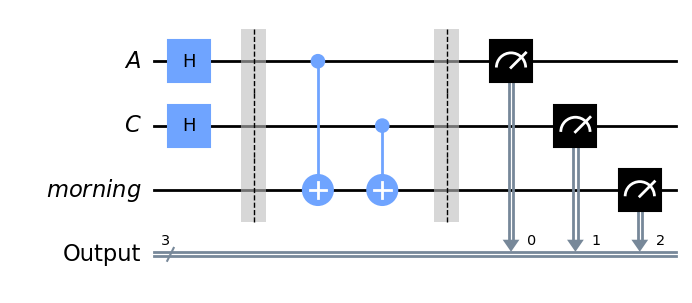

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qA = QuantumRegister(1, name="A")
qC = QuantumRegister(1, name="C")
qMorning = QuantumRegister(1, name="morning")
c = ClassicalRegister(3, name="Output")
qc = QuantumCircuit(qA, qC, qMorning, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)

qc.barrier()

# 朝のシフト
qc.cx(0, 2)
qc.cx(1, 2)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2], [0, 1, 2])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, A: {k[::-1][0]}, C: {k[::-1][1]}, 朝: {k[::-1][2]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl")

先ほどの表と同じ結果が得られました。

次に昼の条件を考えます。昼の条件は B のみが "1" になればいいので、以下の表で表現できます。

| B | 条件に合致している |
| :-: | :-: |
| 0 | 0 |
| 1 | 1 |

これは単純にBの結果をそのまま持ってこればよいことがわかります。\
つまり、CXゲートを施せば実現できます。

観測回数: 1000回
取得した値: '00', 取得回数: 499回, B: 0, 昼: 0
取得した値: '11', 取得回数: 501回, B: 1, 昼: 1


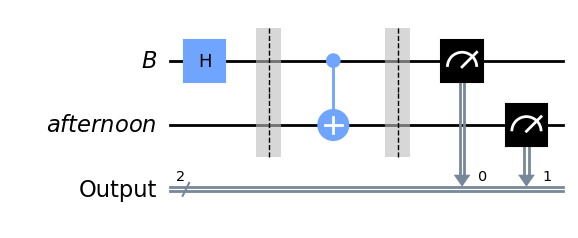

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qB = QuantumRegister(1, name="B")
qAfternoon = QuantumRegister(1, name="afternoon")
c = ClassicalRegister(2, name="Output")
qc = QuantumCircuit(qB, qAfternoon, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)

qc.barrier()

# 昼のシフト
qc.cx(0, 1)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1], [0, 1])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, B: {k[::-1][0]}, 昼: {k[::-1][1]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl")

先ほどの表と同じ結果が得られました。

#### **最終的に完成した回路**
今までに得られた3つの条件を実装する量子回路をもとに全体の量子回路を作成します。

観測回数: 1000回
取得した値: '001101', 取得回数: 132回, A: 0, B: 0, C: 1, 朝: 1, 昼: 0, 夜: 1
取得した値: '010011', 取得回数: 117回, A: 0, B: 1, C: 0, 朝: 0, 昼: 1, 夜: 1
取得した値: '000000', 取得回数: 125回, A: 0, B: 0, C: 0, 朝: 0, 昼: 0, 夜: 0
取得した値: '111010', 取得回数: 108回, A: 1, B: 1, C: 1, 朝: 0, 昼: 1, 夜: 0
取得した値: '100100', 取得回数: 136回, A: 1, B: 0, C: 0, 朝: 1, 昼: 0, 夜: 0
取得した値: '101001', 取得回数: 123回, A: 1, B: 0, C: 1, 朝: 0, 昼: 0, 夜: 1
取得した値: '011110', 取得回数: 121回, A: 0, B: 1, C: 1, 朝: 1, 昼: 1, 夜: 0
◯  取得した値: '110111', 取得回数: 138回, A: 1, B: 1, C: 0, 朝: 1, 昼: 1, 夜: 1


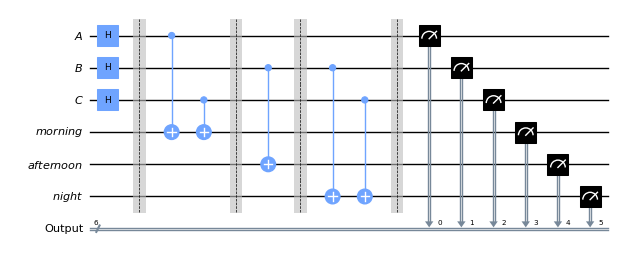

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qA = QuantumRegister(1, name="A")
qB = QuantumRegister(1, name="B")
qC = QuantumRegister(1, name="C")
qMorning = QuantumRegister(1, name="morning")
qAfternoon = QuantumRegister(1, name="afternoon")
qNight = QuantumRegister(1, name="night")
c = ClassicalRegister(6, name="Output")
qc = QuantumCircuit(qA, qB, qC, qMorning, qAfternoon, qNight, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()

# 朝のシフト
qc.cx(0, 3)
qc.cx(2, 3)

qc.barrier()

# 昼のシフト
qc.cx(1, 4)

qc.barrier()

# 夜のシフト
qc.cx(1, 5)
qc.cx(2, 5)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    if k[::-1][3:] == '111':
        print(f"◯  取得した値: '{k[::-1]}', 取得回数: {v}回, A: {k[::-1][0]}, B: {k[::-1][1]}, C: {k[::-1][2]}, 朝: {k[::-1][3]}, 昼: {k[::-1][4]}, 夜: {k[::-1][5]}")
    else:
        print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, A: {k[::-1][0]}, B: {k[::-1][1]}, C: {k[::-1][2]}, 朝: {k[::-1][3]}, 昼: {k[::-1][4]}, 夜: {k[::-1][5]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", scale=0.5, fold=-1)

3つの条件が全て "1" の場合 A と B が "1" になっていることがわかります。\
従って、A と B さんがシフトに入ることになります。これは求めたい勤務表になっていることがわかります。\
以上でシフトデータを埋め込むことができました。

#### **最終的に完成した回路（当たりをつけた場合）**
3つの条件が全て "1" の場合に当たりをつけて結果を表示してみます。\
上の量子回路に加えて例題で説明したCCCXゲートをもとに全体の量子回路を作成します。

観測回数: 1000回
取得した値: '00110100', 取得回数: 125回, A: 0, B: 0, C: 1, 朝: 1, 昼: 0, 夜: 1, 答え: 0
取得した値: '10010000', 取得回数: 122回, A: 1, B: 0, C: 0, 朝: 1, 昼: 0, 夜: 0, 答え: 0
取得した値: '10100100', 取得回数: 115回, A: 1, B: 0, C: 1, 朝: 0, 昼: 0, 夜: 1, 答え: 0
取得した値: '11101000', 取得回数: 126回, A: 1, B: 1, C: 1, 朝: 0, 昼: 1, 夜: 0, 答え: 0
取得した値: '01001100', 取得回数: 109回, A: 0, B: 1, C: 0, 朝: 0, 昼: 1, 夜: 1, 答え: 0
取得した値: '00000000', 取得回数: 123回, A: 0, B: 0, C: 0, 朝: 0, 昼: 0, 夜: 0, 答え: 0
取得した値: '01111010', 取得回数: 131回, A: 0, B: 1, C: 1, 朝: 1, 昼: 1, 夜: 0, 答え: 0
取得した値: '11011111', 取得回数: 149回, A: 1, B: 1, C: 0, 朝: 1, 昼: 1, 夜: 1, 答え: 1


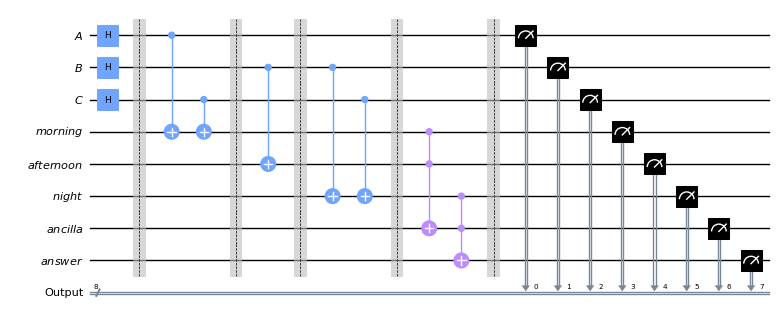

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qA = QuantumRegister(1, name="A")
qB = QuantumRegister(1, name="B")
qC = QuantumRegister(1, name="C")
qMorning = QuantumRegister(1, name="morning")
qAfternoon = QuantumRegister(1, name="afternoon")
qNight = QuantumRegister(1, name="night")
qAncilla = AncillaRegister(1, name="ancilla")
qAnswer = AncillaRegister(1, name="answer")
c = ClassicalRegister(8, name="Output")
qc = QuantumCircuit(qA, qB, qC, qMorning, qAfternoon, qNight, qAncilla, qAnswer, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()

# 朝のシフト
qc.cx(0, 3)
qc.cx(2, 3)

qc.barrier()

# 昼のシフト
qc.cx(1, 4)

qc.barrier()

# 夜のシフト
qc.cx(1, 5)
qc.cx(2, 5)

qc.barrier()

# CCCXゲート
qc.ccx(3, 4, 6)
qc.ccx(5, 6, 7)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, A: {k[::-1][0]}, B: {k[::-1][1]}, C: {k[::-1][2]}, 朝: {k[::-1][3]}, 昼: {k[::-1][4]}, 夜: {k[::-1][5]}, 答え: {k[::-1][7]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", scale=0.5, fold=-1)

3つの条件が全て "1" の場合に当たりがつけられていることがわかります。\
従って、答えが "1" の場合に A と B が "1" になるので、先ほどの結果と同様に A と B さんがシフトに入り、求めたい勤務表になっていることがわかります。

## **3. 演習・考察**
ここでは今までの内容をもとに演習を行なっていきます。

### **演習1**
以下のシフト希望から勤務表を作成してみよう。

|従業員|朝|昼|夜|深夜|
|:-:|:-:|:-:|:-:|:-:|
|A|◯|||◯|
|B||◯||◯|
|C|◯||◯||

#### **求めたい最終結果**

||朝|昼|夜|深夜|
|:-:|:-:|:-:|:-:|:-:|
|従業員の人数|1|1|1|1|

#### **解答例**
朝と深夜の部分は例題の朝と夜の部分と同じ回路。\
昼と夜の部分は例題の昼の部分と同じ回路。

観測回数: 1000回
取得した値: '1101100', 取得回数: 118回, A: 1, B: 1, C: 0, 朝: 1, 昼: 1, 夜: 0, 深夜: 0
取得した値: '1110110', 取得回数: 109回, A: 1, B: 1, C: 1, 朝: 0, 昼: 1, 夜: 1, 深夜: 0
取得した値: '0011010', 取得回数: 148回, A: 0, B: 0, C: 1, 朝: 1, 昼: 0, 夜: 1, 深夜: 0
取得した値: '1010011', 取得回数: 120回, A: 1, B: 0, C: 1, 朝: 0, 昼: 0, 夜: 1, 深夜: 1
取得した値: '0100101', 取得回数: 109回, A: 0, B: 1, C: 0, 朝: 0, 昼: 1, 夜: 0, 深夜: 1
◯  取得した値: '0111111', 取得回数: 123回, A: 0, B: 1, C: 1, 朝: 1, 昼: 1, 夜: 1, 深夜: 1
取得した値: '1001001', 取得回数: 147回, A: 1, B: 0, C: 0, 朝: 1, 昼: 0, 夜: 0, 深夜: 1
取得した値: '0000000', 取得回数: 126回, A: 0, B: 0, C: 0, 朝: 0, 昼: 0, 夜: 0, 深夜: 0


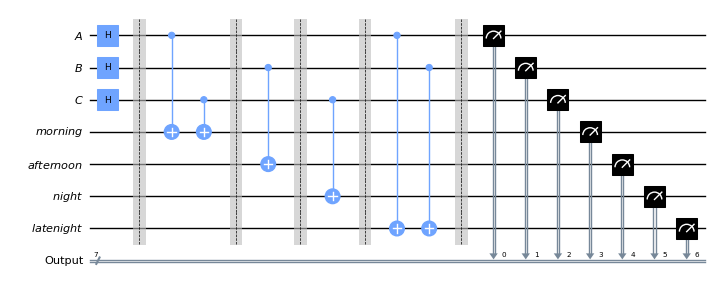

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qA = QuantumRegister(1, name="A")
qB = QuantumRegister(1, name="B")
qC = QuantumRegister(1, name="C")
qMorning = QuantumRegister(1, name="morning")
qAfternoon = QuantumRegister(1, name="afternoon")
qNight = QuantumRegister(1, name="night")
qLatenight = QuantumRegister(1, name="latenight")
c = ClassicalRegister(7, name="Output")
qc = QuantumCircuit(qA, qB, qC, qMorning, qAfternoon, qNight, qLatenight, c)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier()

# 朝のシフト
qc.cx(0, 3)
qc.cx(2, 3)

qc.barrier()

# 昼のシフト
qc.cx(1, 4)

qc.barrier()

# 夜のシフト
qc.cx(2, 5)

qc.barrier()

# 深夜のシフト
qc.cx(0, 6)
qc.cx(1, 6)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    if k[::-1][3:] == '1111':
        print(f"◯  取得した値: '{k[::-1]}', 取得回数: {v}回, A: {k[::-1][0]}, B: {k[::-1][1]}, C: {k[::-1][2]}, 朝: {k[::-1][3]}, 昼: {k[::-1][4]}, 夜: {k[::-1][5]}, 深夜: {k[::-1][6]}")
    else:
        print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, A: {k[::-1][0]}, B: {k[::-1][1]}, C: {k[::-1][2]}, 朝: {k[::-1][3]}, 昼: {k[::-1][4]}, 夜: {k[::-1][5]}, 深夜: {k[::-1][6]}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", scale=0.5, fold=-1)

結果から B と C さんが勤務表に入る。

### **演習2**
3 量子ビットを色分け (0: 黒, 1: 白) することを考える場合に、q_0 と q_1、q_1 と q_2 の間の「エッジ」を考える。エッジの両端が異なる色ならエッジはカットできると呼ぶ。カット可能なエッジ数を数えたい。

また、これを用いて最大のカット数となる色の塗分けのパターンも求めたい。

#### **解答例**

観測回数: 1000回
取得した値: '01', 取得回数: 1000回, 切る本数: 2本


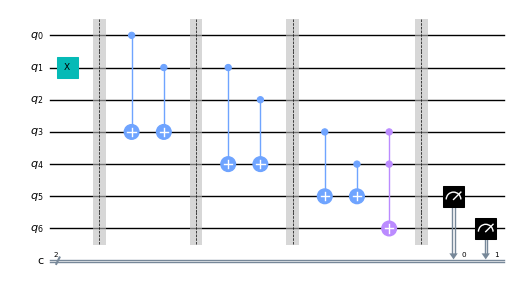

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, AncillaRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qc = QuantumCircuit(7, 2)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.x(1)

# nodeS
qc.barrier()
qc.cx(0, 3)
qc.cx(1, 3)

# nodeA
qc.barrier()
qc.cx(1, 4)
qc.cx(2, 4)

# nodeB
qc.barrier()
qc.cx(3, 5)
qc.cx(4, 5)
qc.ccx(3, 4, 6)

qc.barrier()

# Step2. 観測して値を取得する。
qc.measure([5, 6], [0, 1])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: '{k[::-1]}', 取得回数: {v}回, 切る本数: {int(k, 2)}本")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford", scale=0.5, fold=-1)

## **参考文献 & ツール**


*   [IBM Quantumで学ぶ量子コンピュータ](https://amzn.asia/d/16wLqBQ)
*   [Qiskit (Version-0.45.0)](https://qiskit.org/)
*   [IBM Quantum (IBM社)](https://quantum-computing.ibm.com/)
*   [Qplat (DEVEL社)](http://qplat-education.devel-q.com/)

## **その他**
著者: 比嘉恵一朗（DEVEL株式会社）、外林俊介\
この講座内容の著作権は全て[一般社団法人日本量子コンピューティング協会](https://www.jqca.org/)に帰属しています。